## Multiple Linear Regression

### Bike Sharing Assignment

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

the variables are significant in predicting the demand for shared bikes.
and how well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data
Reading the Bike sharing dataset

Let us first import NumPy and Pandas and read the housing dataset

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [21]:
bike_df = pd.read_csv("day.csv")
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [22]:
bike_df.shape

(730, 16)

There are 730 rows and 16 columns in the entire dataset

In [23]:
# check for NULL values in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Inference:
Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [29]:
# Let us examine the statistics of the numeric variables
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [30]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [31]:
#check for NULL values in all the coulumns
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [32]:
# row-wise null count percentage
round((bike_df.isnull().sum(axis=1)/len(bike_df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

##### Observations:
There are no NULL values in columns and rows.

In [33]:
#### Checking for duplicate values

bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [34]:
bike_df.shape

(730, 16)

Inferences:
Duplicate values are not present

### Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant: It's only an index value
dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

We will save the new dataframe as bike_rel, so that the original dataset is preserved for any future analysis/validation

In [35]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [36]:
bike_rel=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [37]:
bike_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Step 2: Visualising the Data
Here we do the following tasks:

1. We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)

2. Checking if there is any multicollinearity

3. Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable


We'll visualise our data using matplotlib and seaborn.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables : Using a pairplot

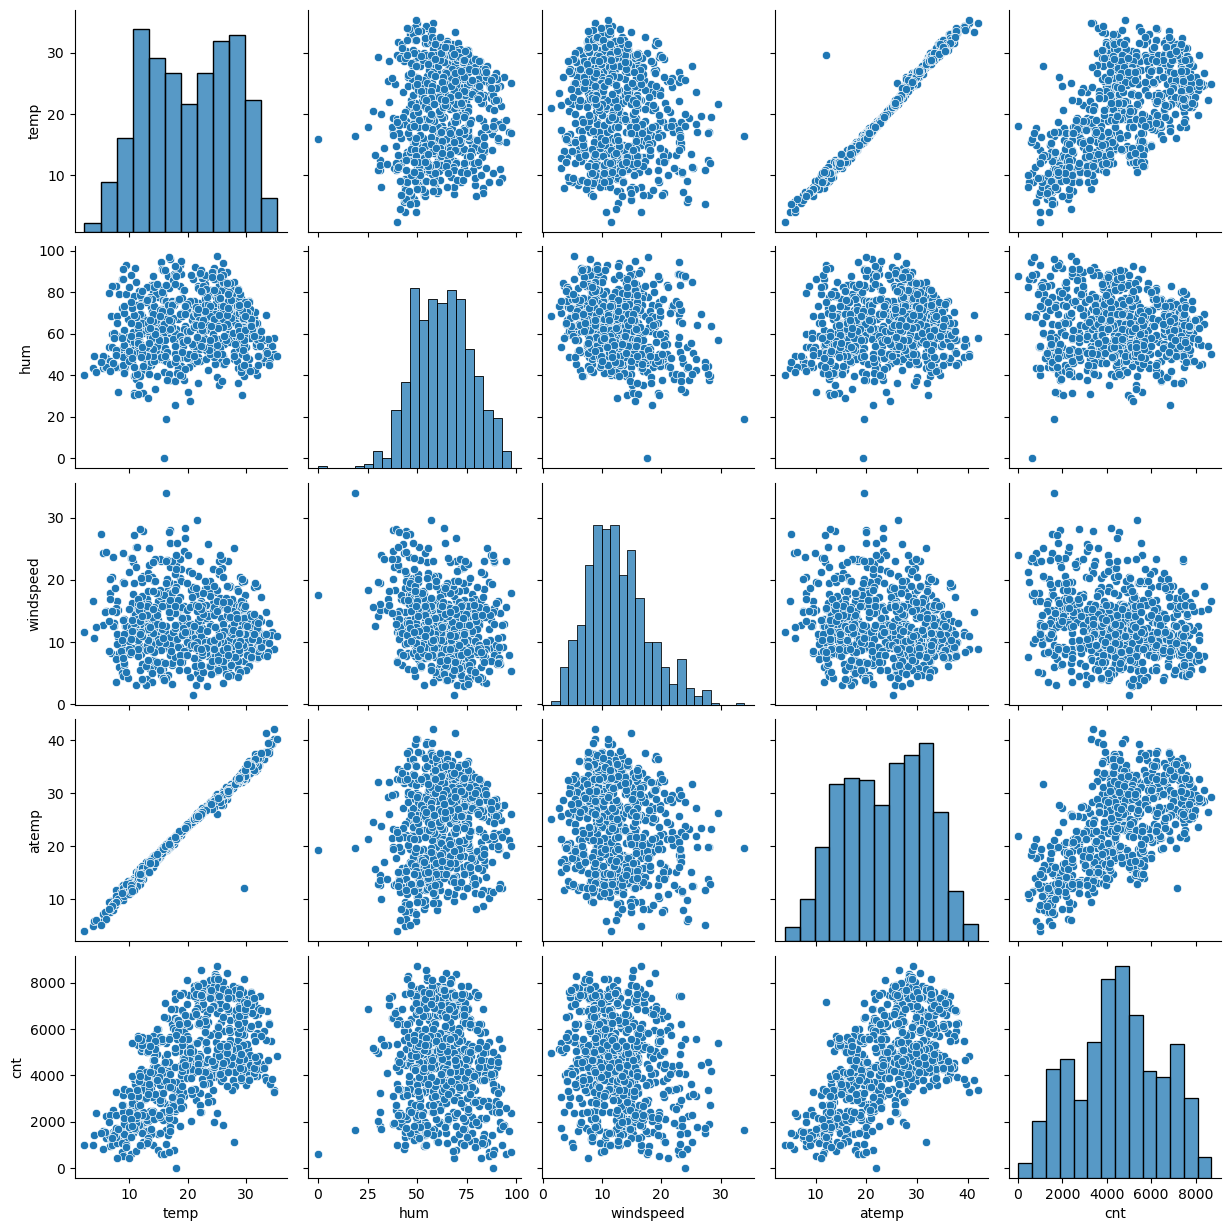

In [39]:
sns.pairplot(data = bike_rel, vars=['temp', 'hum','windspeed','atemp','cnt'])
plt.show()

#### Inference :
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt.

### Visualising Categorical Variables : Using a Boxplot

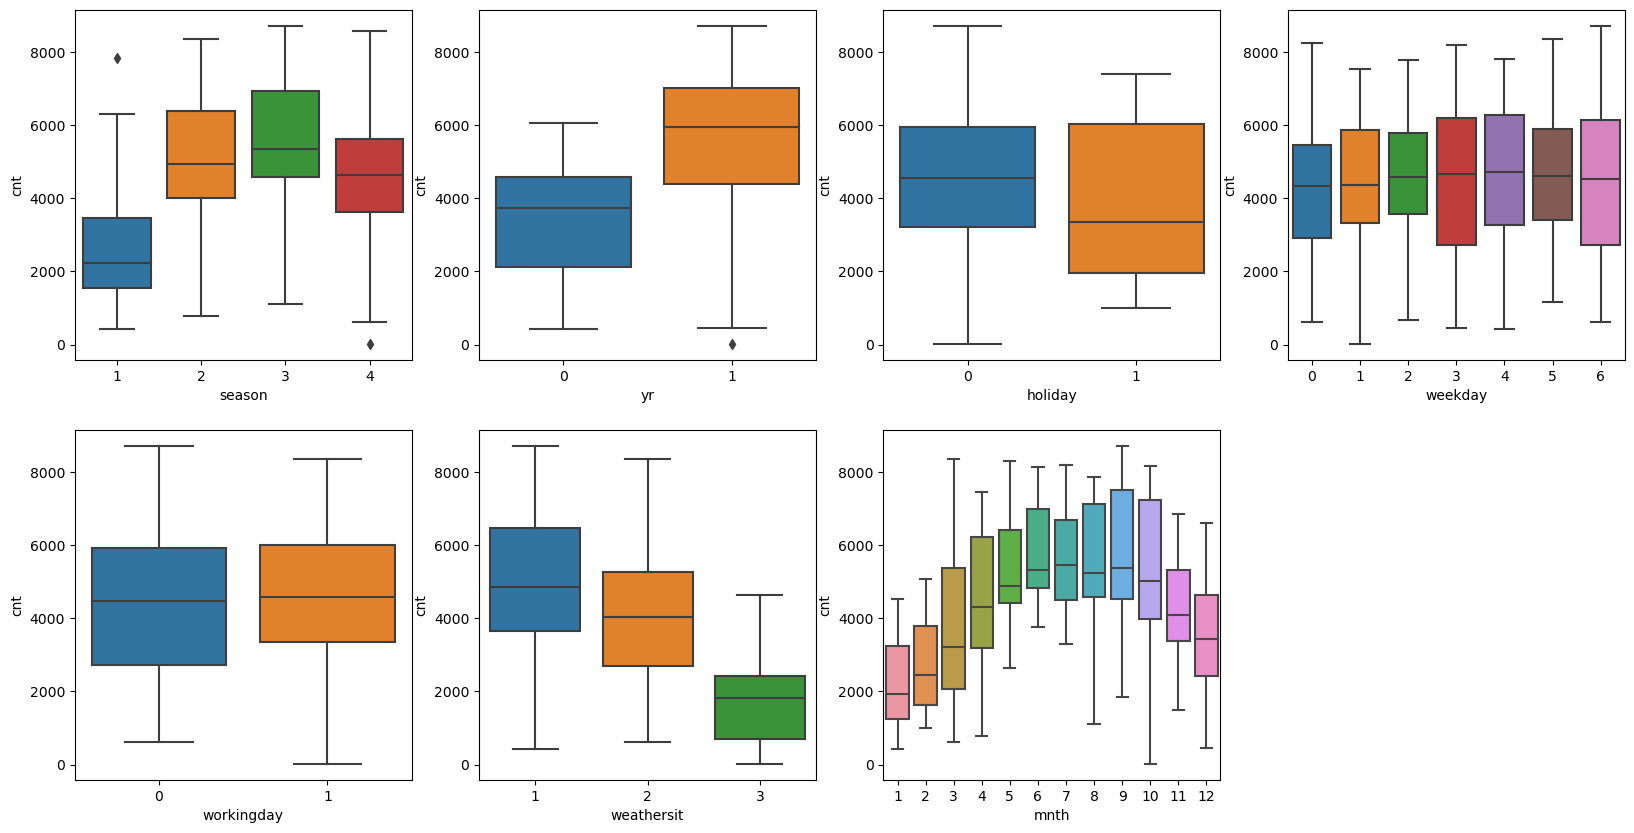

In [40]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rel)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rel)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rel)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rel)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rel)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rel)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rel)
plt.show()

#### Inference:

• The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.

• For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring

• The year 2019 had a higher count of users as compared to the year 2018

• The bike demand is almost constant throughout the week.

• The count of total users is in between 3800 to 6300 (~5500) during clear weather

• The count is highest in the month of September and October.

• The count of users is less during the holidays

## Step 3: Data Preparation
Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [41]:
import calendar
bike_rel['mnth'] = bike_rel['mnth'].apply(lambda x: calendar.month_abbr[x])

In [42]:
# Maping seasons
bike_rel.season = bike_rel.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [43]:
# Mapping weathersit
bike_rel.weathersit = bike_rel.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [44]:
#Mapping Weekday
bike_rel.weekday = bike_rel.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [45]:
# Check the dataframe now

bike_rel.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables Creation

The variables mnth, weekda, season, weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [46]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy_df = bike_rel[['season','mnth','weekday','weathersit']]

In [47]:
dummy_df = pd.get_dummies(dummy_df,drop_first=True )

In [48]:
# Adding the dummy variables to the original dataset
bike_rel = pd.concat([dummy_df,bike_rel],axis = 1)

In [49]:
# Checking the dataframe

bike_rel.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [50]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike_rel.drop(['season'],axis=1,inplace=True)
bike_rel.drop(['weathersit'],axis=1,inplace=True)

bike_rel.drop(['weekday'],axis=1,inplace=True)

bike_rel.drop(['mnth'],axis=1,inplace=True)


bike_rel.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
# Check the shape of the new datframe
bike_rel.shape

(730, 30)

In [52]:
# Checking the data-types of each of the columns in the new dataframe
bike_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.We split the data as 70% training data and 30% testing dataset.

In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

b_train, b_test = train_test_split(bike_rel, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
# Check the no. of rows and columns test data 
b_test.shape

(219, 30)

In [67]:
# Check the no. of rows and columns test data 
b_train.shape

(510, 30)

In [68]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

## Step 5 :Rescaling the Features

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

We use MinMax scaling.

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [70]:
# Apply scaler() to all the numerical columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

b_train[num_vars] = scaler.fit_transform(b_train[num_vars])

In [71]:
b_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [72]:
b_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation to see which variables are highly correlated

In [73]:
plt.figure(figsize = (20, 25))
sns.heatmap(b_train.corr(), annot = True, cmap="PuRd")
plt.show()

#### Inference:

It can be seen from the heatmap, that atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , we'll build a model using all the columns.

### Dividing into X and Y sets for the model building

In [74]:
y_train = b_train.pop('cnt')
X_train = b_train

In [75]:
y_train.shape

(510,)

In [76]:
X_train.shape

(510, 29)

## Step 6: Building a linear model

##### APPROACH USED :

We will use a mixed approach to build the model.

Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model


### Feature Selection
We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [78]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [80]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [81]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [82]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics¶

#### VIF Check:

(VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


##### Adding a constant variable

For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [85]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [86]:
lr1.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
dtype: float64

In [88]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.31e-191
Time:                        17:35:41   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 2:

In [89]:
# Removing the variable 'hum' based on its High VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


In [91]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [92]:
# Check the parameters obtained

lr2.params

const                           0.173663
season_Spring                  -0.059704
season_Summer                   0.043352
season_Winter                   0.079699
mnth_Jan                       -0.038947
mnth_Jul                       -0.048222
mnth_Sep                        0.075318
weekday_Saturday                0.058434
weathersit_Light Snow & Rain   -0.291727
weathersit_Mist & Cloudy       -0.082621
yr                              0.234361
holiday                        -0.056199
workingday                      0.046502
temp                            0.472823
windspeed                      -0.156264
dtype: float64

In [93]:
## Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          7.33e-189
Time:                        17:36:10   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 3

Removing the variable "workingday" based on its Very High 'VIF' value.
Even though the VIF of workingday is second highest, we decided to drop 'Workingday' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [94]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.16
12,windspeed,4.64
0,season_Spring,2.76
1,season_Summer,2.23
9,yr,2.07
2,season_Winter,1.80
3,mnth_Jan,1.61
4,mnth_Jul,1.59
8,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


In [96]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [97]:
# Check for lr3 params
lr3.params

const                           0.212097
season_Spring                  -0.061299
season_Summer                   0.042485
season_Winter                   0.076900
mnth_Jan                       -0.038289
mnth_Jul                       -0.051174
mnth_Sep                        0.076032
weekday_Saturday                0.020135
weathersit_Light Snow & Rain   -0.286860
weathersit_Mist & Cloudy       -0.080792
yr                              0.234633
holiday                        -0.093921
temp                            0.474065
windspeed                      -0.157048
dtype: float64

In [98]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.21e-186
Time:                        17:36:40   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 4

Removing the variable "weekday_Saturday" based on its Very High 'P' value.
Even though the VIF of workingday is second highest, we decided to drop 'Workingday' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'

In [99]:
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


In [101]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [102]:
# Check for lr4 params
lr4.params

const                           0.215488
season_Spring                  -0.061504
season_Summer                   0.042205
season_Winter                   0.077050
mnth_Jan                       -0.037996
mnth_Jul                       -0.050722
mnth_Sep                        0.076239
weathersit_Light Snow & Rain   -0.286377
weathersit_Mist & Cloudy       -0.080675
yr                              0.234197
holiday                        -0.097317
temp                            0.472772
windspeed                      -0.154925
dtype: float64

In [103]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          3.97e-187
Time:                        17:37:23   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Conclusion: 

#### We can cosider the above model i.e lr4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 213.1 and the p-value of 3.97e-187 i.e almost equals to zero, states that the overall model is significant

Hence, we finalise lr_4 as the final model to proceed with the future predictions.

## Step 7: Residual Analysis of the train data¶

In order to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [104]:
y_train_pred = lr4.predict(X_train_lm4)

#### Normality of error terms

Text(0.5, 0, 'Errors')

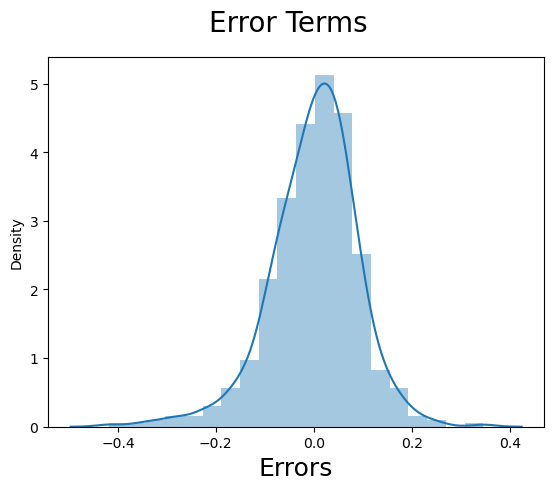

In [105]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Conclusion: 
We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

In [108]:
# Check for the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


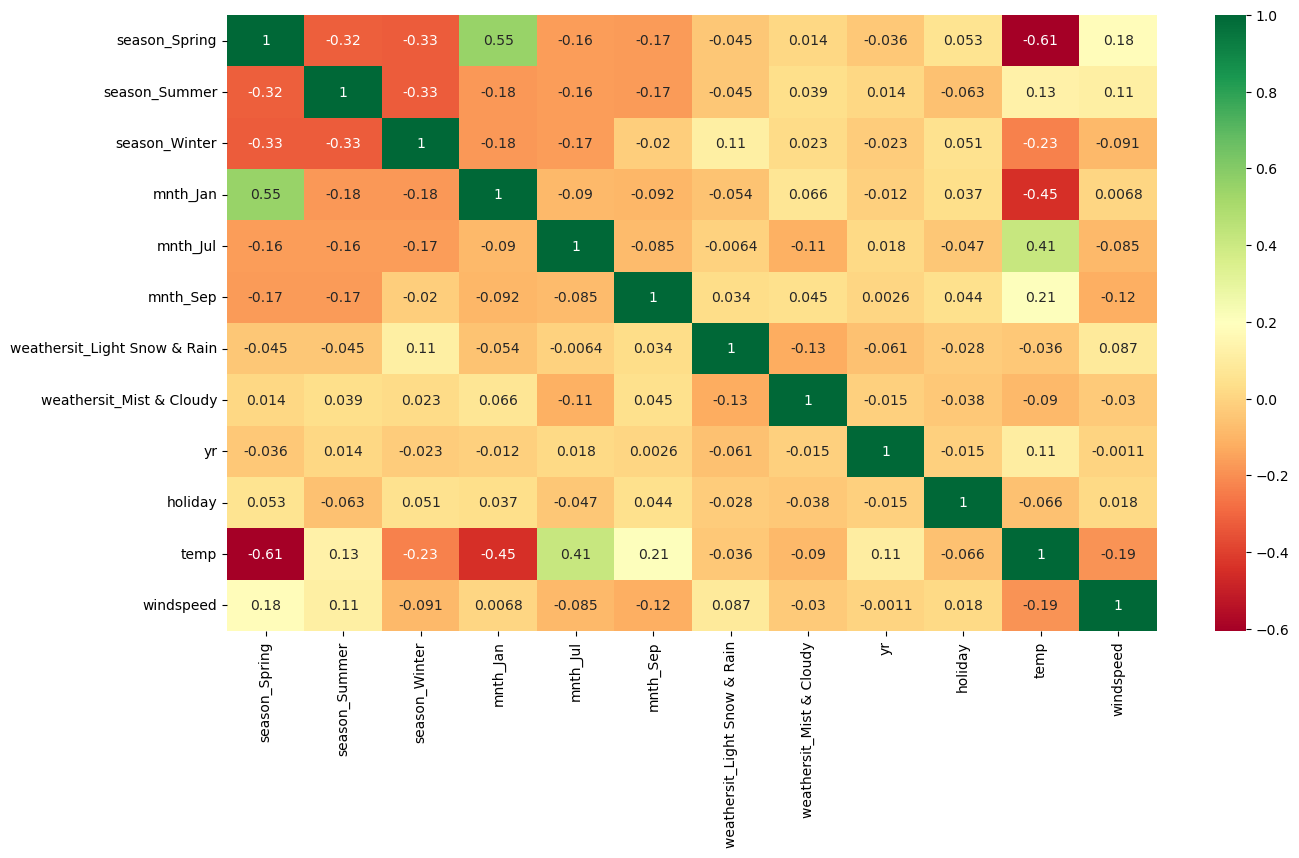

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

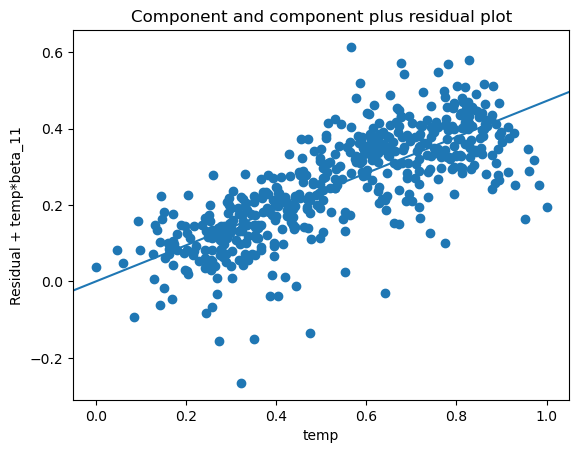

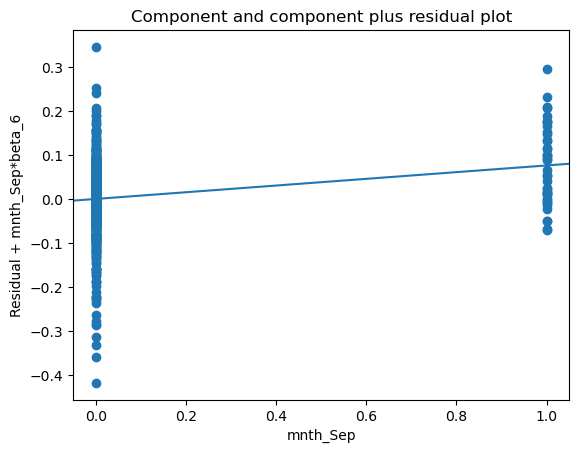

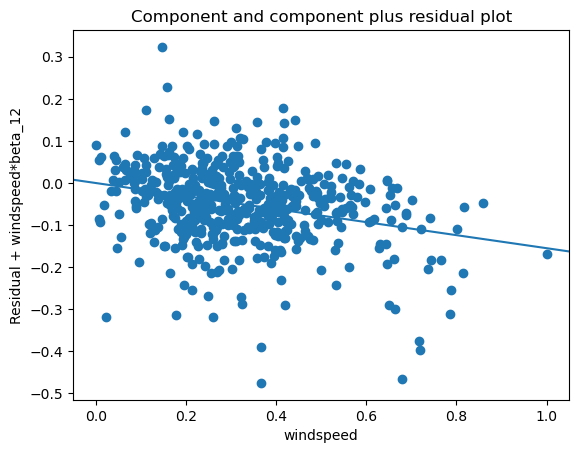

In [110]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr4, 'mnth_Sep')
plt.show()

sm.graphics.plot_ccpr(lr4, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 4th model.

In [111]:
# Applying scaling on the test dataset

num_vars = ['cnt','hum','windspeed','temp','atemp']
b_test[num_vars] = scaler.transform(b_test[num_vars])

In [112]:
b_test.describe()
b_test.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Dividing into X_test and y_test

In [113]:
y_test = b_test.pop('cnt')
X_test = b_test

In [114]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [115]:
col1=X_train_new.columns
#X_test=X_test[col1]
# Adding constant variable to test dataframe
#X_test= sm.add_constant(X_test)
#X_test.info()

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

### Residual Analysis on the test data

In [ ]:
# Making predictions using the final model

y_pred = lr4.predict(X_test_lm4)

#### Normality of Error terms

Text(0.5, 0, 'Errors')

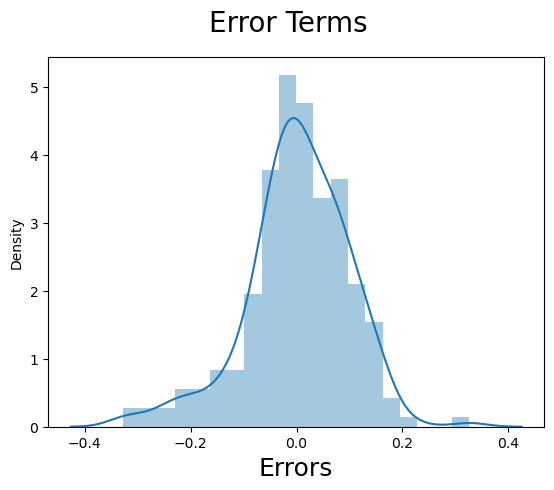

In [122]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Conclusion: 
We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

### Calculating the r-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [124]:
r2=r2_score(y_test, y_pred)
print(r2)

0.8022983156745501


### <font color = 'red'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.8023` and the `r-squared on the trained set 0.837` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

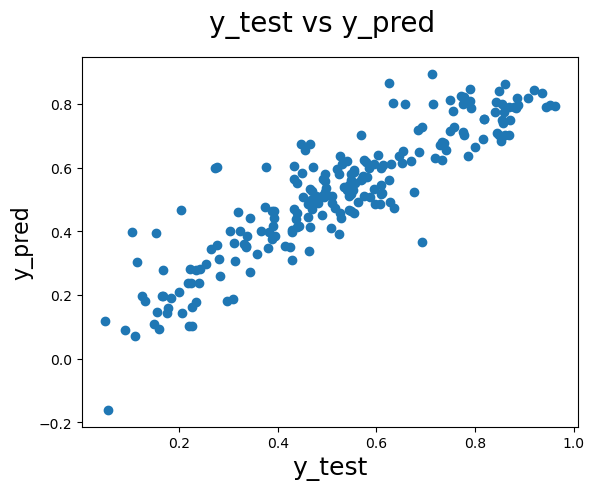

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

#### Conclusion:
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [126]:
round(lr4.params,4)

const                           0.2155
season_Spring                  -0.0615
season_Summer                   0.0422
season_Winter                   0.0771
mnth_Jan                       -0.0380
mnth_Jul                       -0.0507
mnth_Sep                        0.0762
weathersit_Light Snow & Rain   -0.2864
weathersit_Mist & Cloudy       -0.0807
yr                              0.2342
holiday                        -0.0973
temp                            0.4728
windspeed                      -0.1549
dtype: float64

### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

###### cnt =0.12155 + (0.2342*year) −(0.0973*holiday) + (0.4728*temp) − (0.1549*windspeed) + (0.0762*mnth_sep) + (−0.2864*weathersit_Light Snow & Rain) + (-0.0807×weathersit_Mist & Cloudy) + (−0.0615×season_Spring) + (0.0422×season_Summer) + (0.0771×season_Winter)

All the positive coefficients like temp,season_Summer and season_W𝑖𝑛𝑡𝑒𝑟 indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

In [120]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test_lm4.shape[0]-1)/(X_test_lm4.shape[0]-X_test_lm4.shape[1]-1),4)
print(adjusted_r2)

0.7898


From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.

Coefficients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.4728)

year (0.234287)

weathersit_Light Snow & Rain (−0.2864)

Hence, it can be clearly concluded that the variables year, temperature , and weathersit are significant in predicting the demand for shared bikes .

### Final Recommendations for the Company: 

The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
During the Winter season the demand rises, hence it should be well prepared to meet the high demand.